# 4장(관계)-프로그래밍 실습

## 4-1. 곱집합 (Cartesian Product) : 데카르트곱

#### 순서쌍(ordered pair) 표현하기

In [16]:
iterable1 = 'ABCD'
iterable2 = 'XY'

data = list()
for a in iterable1:
    for b in iterable2:
        data.append( (a, b))
        
print(data)

[('A', 'X'), ('A', 'Y'), ('B', 'X'), ('B', 'Y'), ('C', 'X'), ('C', 'Y'), ('D', 'X'), ('D', 'Y')]


In [14]:
A = {'x','y','z'}
B = {1, 2, 3}

# S = set()
S = list()
for a in A:
    for b in B:
#         S.add((a, b))
        S.append((a, b))
print(S)

[('y', 1), ('y', 2), ('y', 3), ('x', 1), ('x', 2), ('x', 3), ('z', 1), ('z', 2), ('z', 3)]


### [예제 4-1] 곱집합 계산2
- $A X B$
- $B X A$

In [18]:
import itertools

A = {1, 2, 3}
B = {'x','y'}

print(set(itertools.product(A, B)))
print(set(itertools.product(B, A)))

{(3, 'y'), (2, 'x'), (3, 'x'), (1, 'y'), (1, 'x'), (2, 'y')}
{('y', 3), ('x', 3), ('x', 2), ('y', 2), ('x', 1), ('y', 1)}


### [예제 4-2] 곱집합 계산2
- $L  X  M X O$

In [32]:
import itertools

L = {'C','J','P'}  # 언어
M = {128,256,512}  # 메모리
O = {'U','W'}      # 운영체제

print('*곱집합: ', set(itertools.product(L, M, O)))
print('*원소개수:', len(set(itertools.product(L, M, O))))
# print(list(itertools.product(L, M, O)))

*곱집합:  {('P', 256, 'U'), ('J', 128, 'W'), ('J', 256, 'W'), ('C', 128, 'W'), ('C', 512, 'W'), ('P', 512, 'W'), ('C', 256, 'U'), ('P', 128, 'W'), ('P', 256, 'W'), ('J', 128, 'U'), ('J', 512, 'U'), ('C', 512, 'U'), ('P', 128, 'U'), ('J', 256, 'U'), ('C', 128, 'U'), ('P', 512, 'U'), ('J', 512, 'W'), ('C', 256, 'W')}
*원소개수: 18


----------------------------

## 4-2 관계와 관계 표현

### [예제 4-3] 이항관계
- R의 원소들이 AxB의 부분집합인지 확인한다.

In [43]:
import itertools

A = {1, 2, 3}
B = {'a','b'}
R = {(1,'a'), (2,'b'), (3,'b'), (1,'b')}

AxB = set(itertools.product(A, B))

result = 'R은 A에서 B로의 관계이다'
for r in R:
    if r not in AxB:
        result = 'R은 A에서 B로의 관계가 아니다'
        break
print(result)

print('원소들의 관계: ')
for r in R:
    print(f'{ r[0] }R{ r[1] }', end=', ')

R은 A에서 B로의 관계이다
원소들의 관계: 
1Ra, 1Rb, 2Rb, 3Rb, 

### [예제 4-5] : 관계구하기1
A = {1,2,3,4,5}일 때  aRb <--> a<b로 정의되는  R을 구하라

In [49]:
import itertools

A = {1, 2, 3, 4, 5}

R = set()
for r in set(itertools.product(A, A)): # 순서쌍
    if r[0] < r[1]:
        R.add( r )

DomR = {r[0] for r in R}
RanR = {r[1] for r in R}
coDomR = DomR | RanR        # 합집합
print(f'R의 정의역: {DomR}')
print(f'R의 치역:   {RanR}')
print(f'R의 공변역: {coDomR}')

R의 정의역: {1, 2, 3, 4}
R의 치역:   {2, 3, 4, 5}
R의 공변역: {1, 2, 3, 4, 5}


### [예제 4-6] : 관계구하기2

In [51]:
import itertools

A = {2, 3, 4, 7}
B = {2, 3, 4, 5, 6}

R = set()
for r in set(itertools.product(A, B)): # 순서쌍
    if r[1]%r[0]==0:
        R.add( r )

print(f'R의 순서쌍(a,b): {R}')

R의 순서쌍(a,b): {(4, 4), (2, 4), (2, 2), (3, 3), (2, 6), (3, 6)}


### 관계 표현하기

- 1.화살표 그림(arrow diagram) 
- 2.관계 행렬(Relation Matrix) 
- 3.유향 그래프(directed graph)
- 4.

### #관계 행렬(Relation Matrix) 표현하기
- https://pypi.org/project/numpy/
- https://numpy.org/

In [ ]:
!pip install numpy

### [예제 4-8] :  관계 행렬 표현하기1
**[주의!!]**
- 관계 행렬을 표시할 때는 집합 대신에 리스트를 이용해야 정확한 관계 행렬을 표시할 수 있다
- 집합은 순서가 없기 때문에 리스트로 변환하여 처리함

In [12]:
import numpy as np

# A = {1,2,3}  
# B = {'a', 'b'}
A = [1,2,3]  
B = ['a', 'b']
R = {(1,'a'), (2,'b'), (3,'b'), (1,'b')}

# 리스트로 표시하기 
datas = []
for a in A: # 행
    data = []
    for b in B: # 열
        r = (a, b)
        if r in R:
            data.append(1)
        else:
            data.append(0)
    datas.append(data)

# 행렬로 표시하기
matrix = np.array(datas)
print('관계행렬(M):\n', matrix)

관계행렬(M):
 [[1 1]
 [0 1]
 [0 1]]


- 함수로 표현하기

In [2]:
import numpy as np

A = [1,2,3]  # 집합은 순서가 없기 때문에 리스트로 변환하여 처리함
B = ['a', 'b']
R = {(1,'a'), (2,'b'), (3,'b'), (1,'b')}

def getBooleanValue(r):   #R순서쌍에 해당하는지 여부 확인
    for pair in R:
        if r == pair: return 1
    return 0

def makeRelationMatrix(A, B):    # 관계 행렬 리스트 만들기
    datas = []
    for a in A:
        data = []
        for b in B:
            r = (a, b) 
            value = getBooleanValue(r)
            data.append(value)
        datas.append(data)

    return np.array(datas)

matrix = makeRelationMatrix(A, B)
print(matrix)

[[1 1]
 [0 1]
 [0 1]]


### [예제 4-9] :  관계 행렬 표현하기2

In [14]:
import numpy as np

A = ['a1','a2','a3']  
B = ['b1','b2','b3','b4']
R = {('a1','b1'),('a1','b4'),('a2','b2'),('a2','b3'),('a3','b1'),('a3','b3')}

# 리스트로 표시하기 
datas = []
for a in A: # 행
    data = []
    for b in B: # 열
        r = (a, b)
        if r in R:
            data.append(1)
        else:
            data.append(0)
    datas.append(data)

# 행렬로 표시하기
matrix = np.array(datas)
print('관계행렬(M):\n', matrix)

관계행렬(M):
 [[1 0 0 1]
 [0 1 1 0]
 [1 0 1 0]]


### [예제 4-10] :  관계 행렬 표현하기3

In [1]:
import numpy as np

A = [1,2,3,4,5]  
R = {(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)}

# 관계 행렬 만들기
def makeRelationMatrix(A, B):    
    datas = []
    for a in A:
        data = []
        for b in B:
            r = (a, b) 
            if r in R: data.append(1)
            else: data.append(0)
        datas.append(data)
        
    return np.array(datas)

matrix = makeRelationMatrix(A, A)
print(matrix)

[[0 1 1 1 1]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]


### #유향 그래프(directed graph) 그리기
- https://pypi.org/project/networkx/ 
- https://networkx.org/
- https://networkx.org/documentation/stable/auto_examples/index.html#examples-gallery

In [ ]:
!pip install matplotlib

In [17]:
!pip install networkx

     ---------------------------------------- 2.0/2.0 MB 16.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### [예제 4-11] : 유향 그래프 그리기  

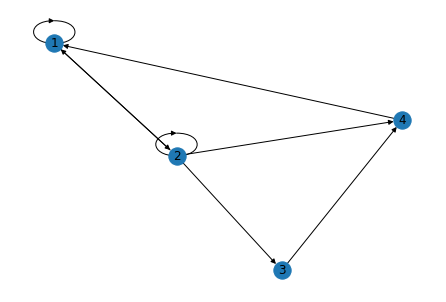

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # DirectedGraph(유향 그래프)

# vertex(node)=점, edge=선 
# A = {1,2,3,4}
# R = {(1,1),(1,2),(2,1),(2,2),(2,3),(2,4),(3,4),(4,1)}
A = [1,2,3,4]
R = [(1,1),(1,2),(2,1),(2,2),(2,3),(2,4),(3,4),(4,1)]
G.add_nodes_from(A) # 점 추가
G.add_edges_from(R) # 간선 추가

#그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
nx.draw(G, with_labels=True)

#이 프로그램이 위치하는 곳에 사진으로 저장
# plt.savefig("G.png")
plt.show()

### [예제 4-12] :  유향 그래프와 관계 행렬 나타내기

[('b', 'a'), ('c', 'b'), ('c', 'a'), ('d', 'b'), ('d', 'a'), ('d', 'c'), ('e', 'b'), ('e', 'a'), ('e', 'c'), ('e', 'd')]
유향그래프:


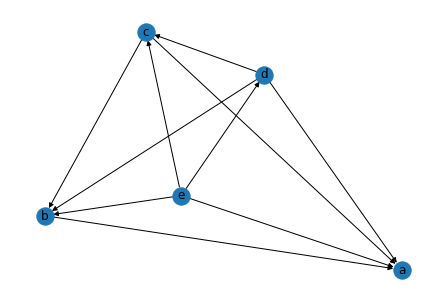

관계행렬(M)
[[0 1 0 0 0]
 [0 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]]


In [50]:
import itertools

# A->A의 관계(R) 만들기
X = {1,2,3,4}
# R = {(r[0],r[1]) for r in list(itertools.product(A,A)) if r[0]>r[1]} # 순서쌍
R = [(r[0],r[1]) for r in list(itertools.product(A,A)) if r[0]>r[1]] 
print(R)


# 유향 그래프 그리기
def makeDirectGraph(A, R):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()  # DirectedGraph(유향 그래프)

    G.add_nodes_from(A) # 점 추가
    G.add_edges_from(R) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    print('유향그래프:')
    nx.draw(G, with_labels=True)
    plt.show()
    

# 관계 행렬 만들기
def makeRelationMatrix(A, B, R):    
    import numpy as np
    
    datas = []
    for a in A: # 행
        data = []
        for b in B: # 열
            r = (a, b)
            if r in R: 
                data.append(1)
            else:
                data.append(0)
        datas.append(data)
        
    return np.array(datas)

makeDirectGraph(A, R)  # 유행 그래프 만들기
matrix = makeRelationMatrix(A, A, R) # 관계헹렬만들기
print('관계행렬(M)')
print(matrix)

------------------------

## 4-3. 경로 (Path)

### [예제 4-16] : 부울곱(논리곱)을 이용해 길이가 2인 경로 찾기
- 부울곱=행렬곱

In [83]:
import numpy as np

A = ['a','b','c','d','e']  #집합은 순서가 없기 때문에 리스트로 변환하여 처리함
R = [('a','a'),('a','b'),('b','c'),('c','d'),('c','e'),('d','e')]


# 관계 행렬 만들기
def makeRelationMatrix(A, B):    
    datas = []
    for a in A:
        data = []
        for b in B:
            r = (a, b) 
            if r in R: 
                data.append(1)
            else:
                data.append(0)
        datas.append(data)
    datas = np.array(datas)
    return datas


# 길이가 2인 관계 행렬의 부울곱(논리곱) 
def getBooleanProduct(M_A, M_B):
        return M_A @ M_B    # np.dot(x,y)

    
# 부울곱을 이용해 길이가 2인 경로 
def getBooleanProductMatrix(matrix):
    R2 = list()
    r, c = matrix.shape
    for i in range(r):
        for j in range(c):
            if matrix[i][j]<=1:
                R2.append((A[i],A[j])) 
    return R2


# 관계 행렬 만들기
matrix = makeRelationMatrix(A, A)
print(matrix)

# 관계 행렬의 부울곱 만들기
matrix = getBooleanProduct(matrix)
print(matrix)

# 부울곱을 이용해 길이가 2인 경로 출력하기
R2 = getBooleanProductMatrix(matrix)
print(R2)

[[1 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]
[[1 1 1 0 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[('a', 'a'), ('a', 'b'), ('a', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'e')]


------------------------------

## 4-4. 관계의 성질
- 반사 관계(reflexive), 비반사 관계(irreflexive) : 
- 대칭 관계(symmetric), 비대칭 관계(asymmetric), 반대칭 관계(antisymmetric) : 
- 추이 관계(transitive)
- **동치 관계(equivalence): 반사 & 대칭 & 추이**

### [예제 4-19]: (a) 반사관계/비반사관계 확인

In [46]:
A = {1,2,3}

R = [] # 관계(순서쌍) 저장
rcnt = 0   # 반사관계 개수
for a in A:
    for b in A:
        if a<=b:
            R.append((a, b))
            if a==b: rcnt+=1

print(f'집합 A : {A}')
print(f'집합 A의 R 순서쌍: {R}')

# 반사관계 확인
if len(A)>0 and len(A)==rcnt:
    print('집합 A는 반사관계이다')    
elif len(A)>0 and rcnt==0:
    print('집합 A는 비반사관계이다')
else:
    print('집합 A는 반사관계와 비반사관계가 모두 아니다')

집합 A : {1, 2, 3}
집합 A의 R 순서쌍: [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
집합 A는 반사관계이다


### [예제 4-21]: 대칭 관계 확인 - 관계 행렬 출력해서 확인해보기

In [47]:
A = [1,2,3,4]  #집합은 순서가 없기 때문에 리스트로 변환하여 처리함
R = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3)]

def makeRelationMatrix(A, B):    # 관계 행렬 리스트 만들기
    datas = []
    for a in A:
        data = []
        for b in B:
            r = (a, b) 
            if r in R: 
                data.append(1)
            else:
                data.append(0)
        datas.append(data)
    datas = np.array(datas)
    return datas

matrix = makeRelationMatrix(A, A)
print(matrix)

[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


### [예제 4-24] : 유향 그래프와 대칭 관계

유향그래프:


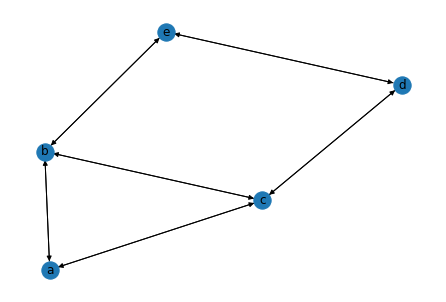

관계행렬(M)
[[0 1 1 0 1]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]]


In [49]:
A = {'a','b','c','d','e'}  
R = [('a','b'),('b','a'),('a','c'),('c','a'),('b','c'),('c','b'),('b','e'),
     ('e','b'),('e','d'),('d','e'),('c','d'),('d','c')]


# 유향 그래프 그리기
def makeDirectGraph(A, R):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()  # DirectedGraph(유향 그래프)

    G.add_nodes_from(A) # 점 추가
    G.add_edges_from(R) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    print('유향그래프:')
    nx.draw(G, with_labels=True)
    plt.show()
    

# 관계 행렬 만들기
def makeRelationMatrix(A, B, R):    
    import numpy as np
    
    datas = []
    for a in A: # 행
        data = []
        for b in B: # 열
            r = (a, b)
            if r in R: 
                data.append(1)
            else:
                data.append(0)
        datas.append(data)
        
    return np.array(datas)

makeDirectGraph(A, R)  # 유행 그래프 만들기
matrix = makeRelationMatrix(A, A, R) # 관계헹렬만들기
print('관계행렬(M)')
print(matrix)

### [예제 4-26] : 동치 관계 --> 관계 행렬과 그래프 그리기

유향그래프:


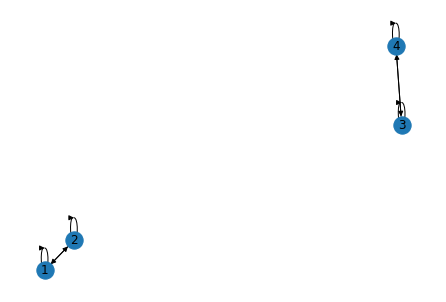

관계행렬(M)
[[1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]]


In [51]:
A = {1,2,3,4}
R = [(1,1),(1,2),(2,1),(2,2),(3,3),(3,4),(4,3),(4,4)]

# 유향 그래프 그리기
def makeDirectGraph(A, R):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()  # DirectedGraph(유향 그래프)

    G.add_nodes_from(A) # 점 추가
    G.add_edges_from(R) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    print('유향그래프:')
    nx.draw(G, with_labels=True)
    plt.show()
    

# 관계 행렬 만들기
def makeRelationMatrix(A, B, R):    
    import numpy as np
    
    datas = []
    for a in A: # 행
        data = []
        for b in B: # 열
            r = (a, b)
            if r in R: 
                data.append(1)
            else:
                data.append(0)
        datas.append(data)
        
    return np.array(datas)

makeDirectGraph(A, R)  # 유행 그래프 만들기
matrix = makeRelationMatrix(A, A, R) # 관계헹렬만들기
print('관계행렬(M)')
print(matrix)

--------------------------

## 4-5: 역관계와 합성 관계

### [예제 4-29] : 역관계와 여관계

In [59]:
import itertools

A = {1,2,3,4}
B = {'a','b','c'}
R = {(1,'a'),(1,'b'),(2,'b'),(2,'c'),(3,'b'),(4,'a')}
S = {(1,'b'),(2,'c'),(3,'b'),(4,'b')}

# 역관계
def getInverseRelation(R):
    data = []
    for r in R:
        data.append((r[1],r[0]))
    return set(data)    


AxB = set(itertools.product(A, B))
print(f'AxB:       {AxB}')
print('-'*50)
print(f'R 여관계: {AxB.difference(R)}') 
print(f'R∩S:     {R&S}')  # 교집합
print(f'R∪S:     {R|S}')  # 합집합
print(f'R 역관계: {getInverseRelation(R)}')

AxB:       {(4, 'a'), (1, 'b'), (2, 'a'), (3, 'a'), (4, 'c'), (4, 'b'), (3, 'c'), (1, 'a'), (2, 'c'), (2, 'b'), (3, 'b'), (1, 'c')}
--------------------------------------------------
R 여관계: {(2, 'a'), (3, 'a'), (4, 'c'), (4, 'b'), (3, 'c'), (1, 'c')}
R∩S:     {(2, 'c'), (3, 'b'), (1, 'b')}
R∪S:     {(4, 'a'), (1, 'b'), (4, 'b'), (1, 'a'), (2, 'c'), (2, 'b'), (3, 'b')}
R 역관계: {('c', 2), ('b', 2), ('a', 1), ('b', 1), ('a', 4), ('b', 3)}


### [예제 4-31] : 관계 행렬을 이용한 역관계와 여관계

In [78]:
import numpy as np

A  = {1,2,3,4}
M_R= np.array([[1,0,1],[0,1,1],[0,0,0]])
M_S= np.array([[0,1,1],[1,1,0],[0,1,0]])
print(M_R)
print(M_S)

def getComplementaryRelation(matrix):
    datas = []
    r, c = matrix.shape
    for i in range(r):
        data = []
        for j in range(c):
            if matrix[i][j]==0: data.append(1) 
            else: data.append(0)
        datas.append(data)
    return np.array(datas)

print('-'*50)
print('M_R 여관계:')
print(getComplementaryRelation(M_R)) # 여행렬
print('M_R 역관계:')
print( M_R.T )                       # 전치행렬  A.transpose()

print('M_R∩M_S:')
print(M_R & M_S)
print('M_R∪M_S:')
print(M_R | M_S)

[[1 0 1]
 [0 1 1]
 [0 0 0]]
[[0 1 1]
 [1 1 0]
 [0 1 0]]
--------------------------------------------------
M_R 여관계:
[[0 1 0]
 [1 0 0]
 [1 1 1]]
M_R 역관계:
[[1 0 0]
 [0 1 0]
 [1 1 0]]
M_R∩M_S:
[[0 0 1]
 [0 1 0]
 [0 0 0]]
M_R∪M_S:
[[1 1 1]
 [1 1 1]
 [0 1 0]]


### [예제 4-32] : 관계 행렬을 이용한 역관계와 여관계

In [80]:
import numpy as np

A = {1,2,3}
R = [(1,1),(1,2),(1,3),(2,2),(3,3)]
S = [(1,1),(1,2),(2,2),(3,2),(3,3)]

# 관계 행렬 만들기
def makeRelationMatrix(A, B, R):    
    import numpy as np
    
    datas = []
    for a in A: # 행
        data = []
        for b in B: # 열
            r = (a, b)
            if r in R: 
                data.append(1)
            else:
                data.append(0)
        datas.append(data)
        
    return np.array(datas)


def getComplementaryRelation(matrix):
    datas = []
    r, c = matrix.shape
    for i in range(r):
        data = []
        for j in range(c):
            if matrix[i][j]==0: data.append(1) 
            else: data.append(0)
        datas.append(data)
    return np.array(datas)


# 관계헹렬만들기
M_R = makeRelationMatrix(A, A, R) 
M_S = makeRelationMatrix(A, A, S)
print(M_R)
print(M_S)

print('-'*50)
print('M_R 여관계:')
print(getComplementaryRelation(M_R)) # 여행렬
print('M_R 역관계:')
print( M_R.T )                       # 전치행렬  A.transpose()

print('M_R∩M_S:')
print(M_R & M_S)
print('M_R∪M_S:')
print(M_R | M_S)

[[1 1 1]
 [0 1 0]
 [0 0 1]]
[[1 1 0]
 [0 1 0]
 [0 1 1]]
--------------------------------------------------
M_R 여관계:
[[0 0 0]
 [1 0 1]
 [1 1 0]]
M_R 역관계:
[[1 0 0]
 [1 1 0]
 [1 0 1]]
M_R∩M_S:
[[1 1 0]
 [0 1 0]
 [0 0 1]]
M_R∪M_S:
[[1 1 1]
 [0 1 0]
 [0 1 1]]


### [예제 4-36] : 합성 관계를 부울곱(논리곱)으로 계산하기

In [88]:
import numpy as np

A  = ['a','b','c']
M_R= np.array([[1,0,1],[1,1,1],[0,1,0]])
M_S= np.array([[1,0,0],[0,1,1],[1,0,1]])
print(M_R)
print(M_S)


# 관계 행렬의 부울곱(논리곱) 
def getBooleanProduct(M_A, M_B):
        return M_A @ M_B    # np.dot(x,y)

    
# 부울곱을 이용해 길이가 2인 경로 
def getBooleanProductMatrix(matrix):
    R2 = list()
    r, c = matrix.shape
    for i in range(r):
        for j in range(c):
            if matrix[i][j]<=1:
                R2.append((A[i],A[j])) 
    return R2


# 관계 행렬의 부울곱 만들기
matrix = getBooleanProduct(M_R, M_S)
print(matrix)

# 합성 관계를 부울곱으로 계산한 결과
R_S = getBooleanProductMatrix(matrix)
print(R_S)

[[1 0 1]
 [1 1 1]
 [0 1 0]]
[[1 0 0]
 [0 1 1]
 [1 0 1]]
[[2 0 1]
 [2 1 2]
 [0 1 1]]
[('a', 'b'), ('a', 'c'), ('b', 'b'), ('c', 'a'), ('c', 'b'), ('c', 'c')]


-------------------------------------

## 4-6: 연결 관계와 와샬 알고리즘

### [예제 4-41] : 연결 관계와 추이 닫힘

유향그래프:


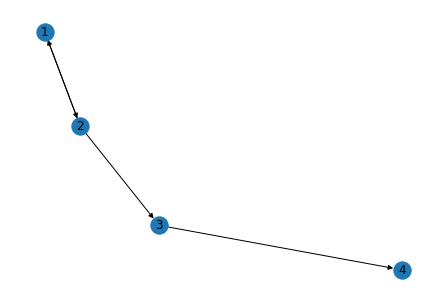

관계행렬(M)
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
[[1 0 1 0]
 [0 1 0 1]
 [0 0 0 0]
 [0 0 0 0]]
[[0 1 0 1]
 [1 0 1 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 1 1 1]
 [1 1 1 1]
 [0 0 0 1]
 [0 0 0 0]]
[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4)]


In [97]:
A = [1, 2, 3, 4]
R = [(1,2),(2,1),(2,3),(3,4)]


# 유향 그래프 그리기
def makeDirectGraph(A, R):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()  # DirectedGraph(유향 그래프)

    G.add_nodes_from(A) # 점 추가
    G.add_edges_from(R) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    print('유향그래프:')
    nx.draw(G, with_labels=True)
    plt.show()
    

# 관계 행렬 만들기
def makeRelationMatrix(A, B, R):    
    import numpy as np
    
    datas = []
    for a in A: # 행
        data = []
        for b in B: # 열
            r = (a, b)
            if r in R: 
                data.append(1)
            else:
                data.append(0)
        datas.append(data)
        
    return np.array(datas)


# 길이가 2인 관계 행렬의 부울곱(논리곱) 
def getBooleanProduct(M_A, M_B):
        return M_A @ M_B    # np.dot(x,y)

    
# 부울곱을 이용해 길이가 2인 경로 
def getBooleanProductMatrix(matrix):
    R2 = list()
    r, c = matrix.shape
    for i in range(r):
        for j in range(c):
            if matrix[i][j]==1:
                R2.append((A[i],A[j])) 
    return R2


makeDirectGraph(A, R)  # 유향 그래프 만들기
matrix = makeRelationMatrix(A, A, R) # 관계행렬만들기
print('관계행렬(M)')
print(matrix)

# 관계 행렬의 부울곱 만들기
matrix2 = getBooleanProduct(matrix, matrix)
print(matrix2)
matrix3 = getBooleanProduct(matrix2, matrix)
print(matrix3)
matrix4 = matrix|matrix2|matrix3
print(matrix4)

# 부울곱을 이용해 길이가 2인 경로 출력하기
R2 = getBooleanProductMatrix(matrix4)
print(R2)


### [예제 4-42] : 와샬 알고리즘